In [21]:
# 라이브러리 import
import cv2
import dlib
import matplotlib.pyplot as plt
import numpy as np

# 이미지 시각화하여 먼저보기

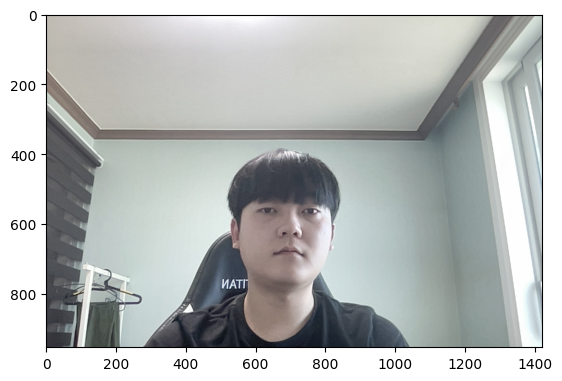

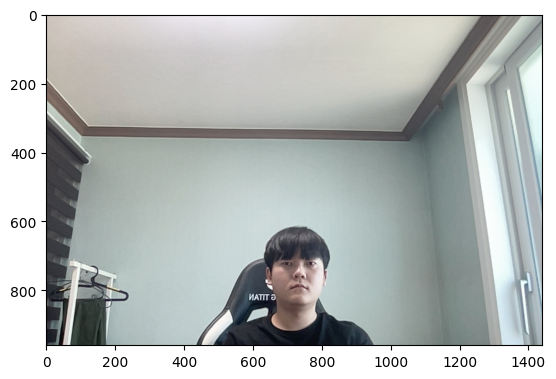

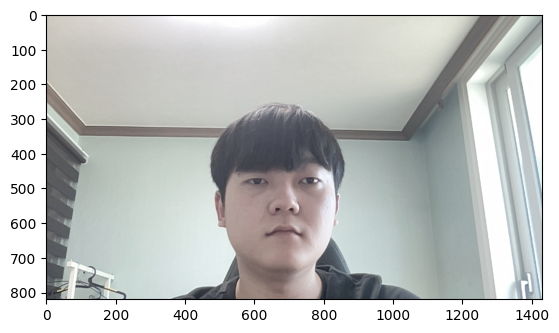

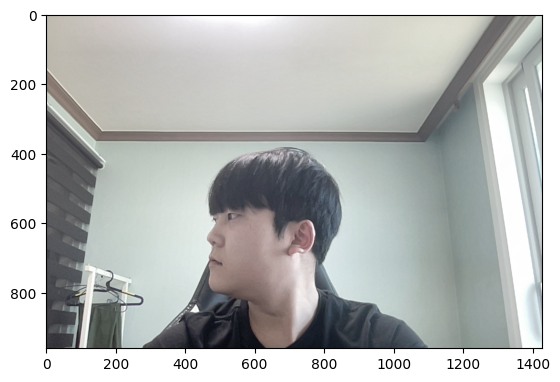

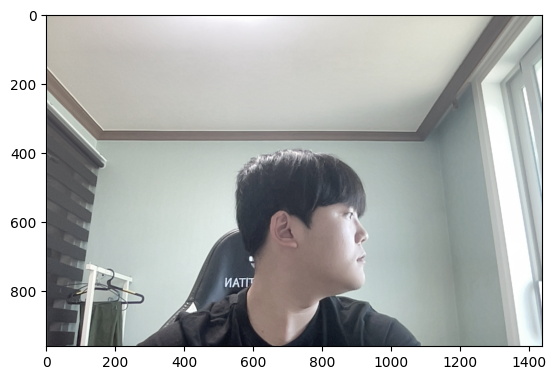

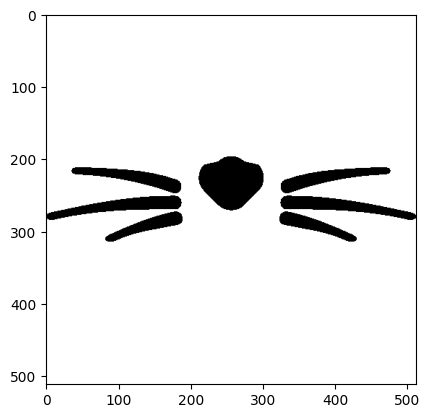

In [22]:
my_image_path = '/content/drive/MyDrive/Colab Notebooks/github/aiffel/08_study/images/'

total_image_paths = [my_image_path+'my_image_face_1.png',my_image_path+'my_image_face_2.png',my_image_path+'my_image_face_3.png',
                     my_image_path+'my_image_left.png',my_image_path+'my_image_right.png']
sticker_image_path = '/content/drive/MyDrive/Colab Notebooks/github/aiffel/08_study/images/cat-whiskers.png'

my_img_rgbs = [] # rgb로 변환한 이미지
img_shows = [] # 출력용 이미지

for my_image_path in total_image_paths:
  img_bgr = cv2.imread(my_image_path)
  img_shows.append(img_bgr) # 출력용 img 저장
  img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB) # rgb로 변환 b->r r_b
  my_img_rgbs.append(img_rgb)

# 내 이미지들 출력
for my_img in my_img_rgbs:
  plt.imshow(my_img) # 이미지를 출력하기 위해 출력할 이미지를 올려준다. (실제 출력은 하지 않음)
  plt.show() # 이미지를 출력해준다. (실제 출력)


sticker_image = cv2.imread(sticker_image_path)
sticker_image = sticker_image

plt.imshow(sticker_image)
plt.show()

# bounding box 및 랜드마크 검출

## bounding box 찾기

In [23]:
# detector를 선언합니다
detector_hog = dlib.get_frontal_face_detector() # 기본 얼굴 감지기를 선언

In [24]:
dlib_rects = []
for img_rgb in my_img_rgbs:
  dlib_rects.append(detector_hog(img_rgb, 1))

print(dlib_rects) # 정면사진들 bounding box 가 나오는걸 확인

[rectangles[[(557, 498) (825, 766)]], rectangles[], rectangles[[(526, 384) (847, 705)]], rectangles[], rectangles[]]


In [25]:

# bounding box 나온것만 따로 저장
bounding_boxes = []
exist_bounding_box_imgs = []

for num, dlib_rect in enumerate(dlib_rects):
  if dlib_rect:
    bounding_boxes.append(dlib_rect)
    exist_bounding_box_imgs.append(img_shows[num])

import copy
img_shows = copy.deepcopy(exist_bounding_box_imgs)

for dlib_rect,img_show in zip(bounding_boxes,exist_bounding_box_imgs): # 찾은 얼굴 영역의 좌표
    l = dlib_rect[0].left() # 왼쪽
    t = dlib_rect[0].top() # 위쪽
    r = dlib_rect[0].right() # 오른쪽
    b = dlib_rect[0].bottom() # 아래쪽

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림

## 랜드마크 찾기

In [26]:
model_path = '/content/drive/MyDrive/Colab Notebooks/github/aiffel/08_study/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

In [27]:
list_landmarks = [] # 랜드마크의 위치를 저장할 list 생성


# bounding box 마다 face landmark 찾고 landmark 저장
for dlib_rect,img_rgb in zip(bounding_boxes, exist_bounding_box_imgs):
    points = landmark_predictor(img_rgb, dlib_rect[0])
        # 모든 landmark의 위치정보를 points 변수에 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        # 각각의 landmark 위치정보를 (x,y) 형태로 변환하여 list_points 리스트로 저장
    list_landmarks.append(list_points)
        # list_landmarks에 랜드마크 리스트를 저장

print(len(list_landmarks)) # bounding box를 갖는 사진이 2장이므로 -> 2출력
print(len(list_landmarks[0])) # 각 사진마다 68개의 랜드마크
print(len(list_landmarks[1])) # 각 사진마다 68개의 랜드마크

2
68
68


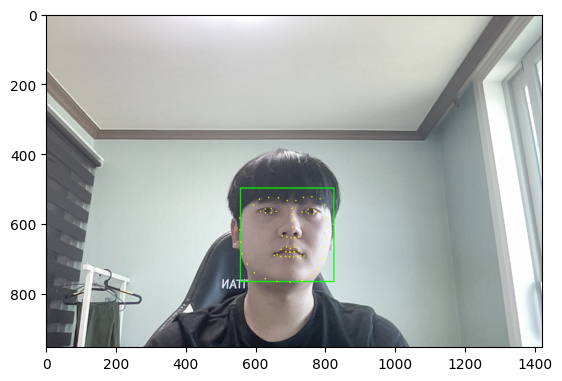

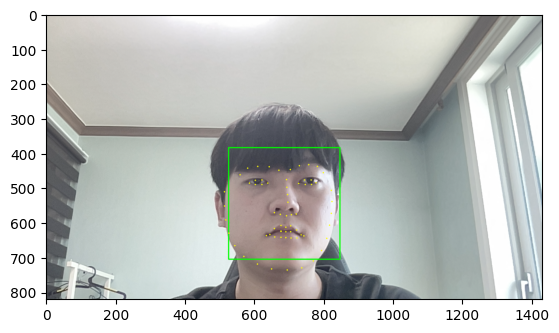

In [28]:
# list_landmarks의 길이가 2이므로 2번실행됨

for landmark,img_show in zip(list_landmarks,exist_bounding_box_imgs):
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)
            # cv2.circle: OpenCV의 원을 그리는 함수
            # img_show 이미지 위 각각의 point에
            # 크기가 2이고 (0, 255, 255)색으로 내부가 채워진(-1) 원을 그림
            # (마지막 인수가 자연수라면 그만큼의 두께의 선으로 원이 그려짐)

for img_show in exist_bounding_box_imgs:
  img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
  plt.imshow(img_show_rgb)
  plt.show()

# 고양이 수염 적용할 landmark

In [29]:
# landmark 27

sticker_xywh = []


for dlib_rect, landmark in zip(bounding_boxes, list_landmarks): # 얼굴 영역을 저장하고 있는 값과 68개의 랜드마크를 저장하고 있는 값으로 반복문 실행
    print (landmark[27]) # 입술 맨위 좌표
    x = landmark[27][0] - dlib_rect[0].width()//2 # 입술 x좌표에서 bounding box의 가로/2 만큼빼줘서 x를 지정
    y = landmark[27][1]
    w = dlib_rect[0].width() # 스티커 이미지 너비는 bounding box의 가로만큼
    h = dlib_rect[0].height()//2 # 스티커 이미지 높이는 bounding box의 세로/2 만큼
    # x,y,w,h 저장
    sticker_xywh.append((x,y,w,h))

    print (f'(x,y) : ({x},{y})')
    print (f'(w,h) : ({w},{h})')

print('--------')
for xywh in sticker_xywh:
  print(xywh)

(705, 556)
(x,y) : (571,556)
(w,h) : (269,134)
(693, 476)
(x,y) : (532,476)
(w,h) : (322,161)
--------
(571, 556, 269, 134)
(532, 476, 322, 161)


In [30]:
# 스티커 이미지 resize
sticker_image_path = '/content/drive/MyDrive/Colab Notebooks/github/aiffel/08_study/images/cat-whiskers.png'
sticker_image = cv2.imread(sticker_image_path)
sticker_image = sticker_image
# sticker_image = cv2.cvtColor(sticker_image, cv2.COLOR_BGR2GRAY) # 테스트

resize_sticker_images = []

for xywh in sticker_xywh:
  _,_,w,h = xywh

  tmp_image = cv2.resize(sticker_image, (w,h)) # 스티커 이미지 각각 조정 → w,h는 얼굴 영역의 가로를 차지하는 픽셀의 수(bounding box크기)
  # resize_sticker_images에 저장
  resize_sticker_images.append(tmp_image)

  print(tmp_image.shape) # 사이즈를 조정한 고양이 수염 이미지 shape 확인

print('-------------')
print(len(resize_sticker_images))

(134, 269, 3)
(161, 322, 3)
-------------
2


In [31]:
# exist_bounding_box_imgs
# 원본이미지에서 스티커를 적용할 위치 = sticker_areas
sticker_areas = []

for xywh,img_show,sticker_img in zip(sticker_xywh, exist_bounding_box_imgs, resize_sticker_images):
  x,y,_,_ = xywh
  # bounding_box랑 landmark가 있는 이미지에 스티커를 저장할 영역
  sticker_areas.append(img_show[y:y+sticker_img.shape[0], x:x+sticker_img.shape[1]])
  # [671:671+134, 566:566+269]

for xywh,img_show,sticker_img,sticker_area in zip(sticker_xywh, exist_bounding_box_imgs, resize_sticker_images, sticker_areas):
  x,y,_,_ = xywh

  img_show[y:y+sticker_img.shape[0], x:x+sticker_img.shape[1]] = \
    np.where(sticker_img==255,sticker_area,sticker_img).astype(np.uint8)
  # np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)
  # plt.imshow(img_show)
  # plt.show()



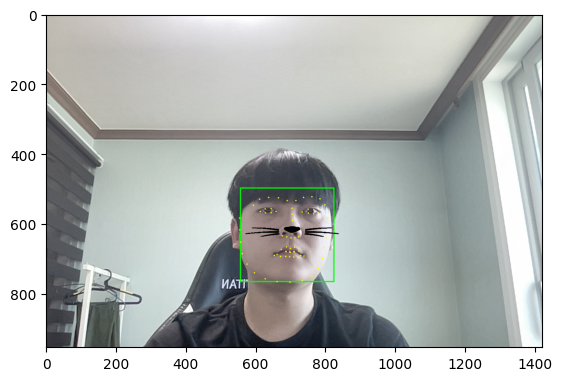

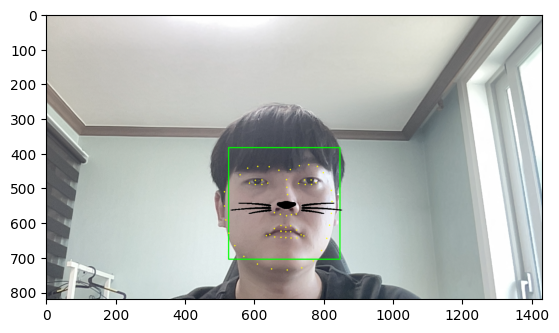

In [32]:
# bounding box + landmakr + 고양이 수염

for img_show in exist_bounding_box_imgs:
  img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
  plt.imshow(img_show_rgb)
  plt.show()

3 3
uint8 uint8


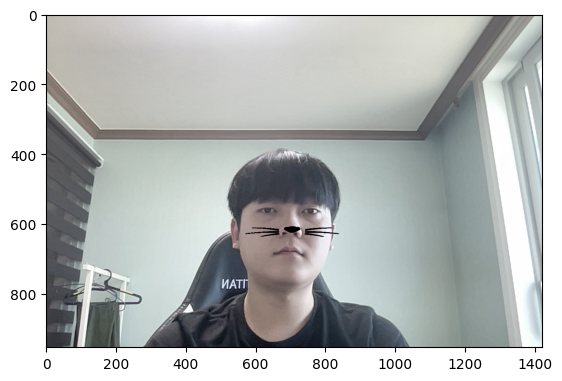

3 3
uint8 uint8


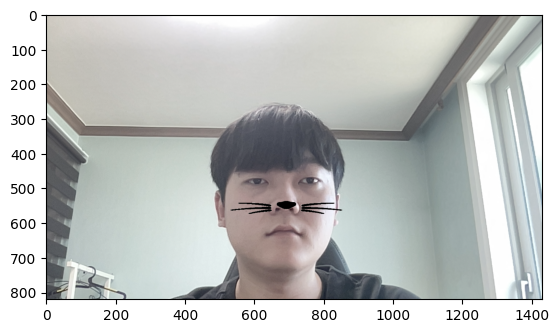

In [33]:
# 원본이미지 + 고양이 수염

sticker_areas = []

for xywh,img_show,sticker_img in zip(sticker_xywh, img_shows, resize_sticker_images):
  x,y,_,_ = xywh
  # bounding_box랑 landmark가 있는 이미지에 스티커를 저장할 영역
  sticker_areas.append(img_show[y:y+sticker_img.shape[0], x:x+sticker_img.shape[1]])
  # [671:671+134, 566:566+269]

for xywh,img_show,sticker_img,sticker_area in zip(sticker_xywh, img_shows, resize_sticker_images, sticker_areas):
  x,y,_,_ = xywh
  img_show[y:y+sticker_img.shape[0], x:x+sticker_img.shape[1]] = \
    np.where(sticker_img==255,sticker_area,sticker_img).astype(np.uint8)

  print(img_show.ndim, sticker_img.ndim)
  print(img_show.dtype, sticker_img.dtype)

  # cv2.addWeighted(img_show, 0.7, sticker_img, 0.3, 0)


  plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
  plt.show()

오늘은 사람얼굴에 대해 bounding box, landmark등을 어떻게 찾고, 특정 사진 (왕관 or 고양이 수염)을 bounding box와 landmark를 활용해 원본이미지의 적절한 위치에 하는것을 배웠다.

왕관이미지 실습할때는 왕관이 아닌부분을 ==0으로 처리했을때 딱 왕관부분만 적용할수 있었는데 고양이 수염사진을 할때는 수염사진이 아닌 여백 부분이 포함되서 나타났다... 아직 뭘 잘못한건지 모르겠다

- 리뷰하는 과정에서 ==0 부분을 ==255로 하면 된다는것을 배웠고 커널을 초기화후 실행해야하는것도 알아서 해결

그리고,
cv2.addWeighted를 활용해서 좀더 자연스러운 이미지를 만들고자 했지만
```sh
error: OpenCV(4.8.0) /io/opencv/modules/core/src/arithm.cpp:647: error: (-209:Sizes of input arguments do not match) The operation is neither 'array op array' (where arrays have the same size and the same number of channels), nor 'array op scalar', nor 'scalar op array' in function 'arithm_op'
````
이런 에러가나와서 찾아봤고, 아래 방법들을 시도해봤지만 적용이 안된다
- 각 이미지의 shape 을 찍었을때 차원 갯수는 똑같음
- 각 이미지의 dtype 을 찍었을때 dtype도 똑같음
- 혹시나하고 dytpe을 둘다 float32로 바꿔서 했는데도 해결이안됨

아직 해결하지 못했다 ^^
